In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = [
    
    ("DB2", "5 Gestures", "3 Features", "Random Forest", 0.846),
    ("DB2", "5 Gestures", "3 Features", "SVM", 0.694),
    ("DB2", "5 Gestures", "3 Features", "KNN", 0.790),
    ("DB2", "5 Gestures", "3 Features", "Logistic Regression", 0.485),
    ("DB2", "5 Gestures", "3 Features", "LDA", 0.471),
    ("DB2", "5 Gestures", "9 Features", "Random Forest", 0.850),
    ("DB2", "5 Gestures", "9 Features", "SVM", 0.796),
    ("DB2", "5 Gestures", "9 Features", "KNN", 0.791),
    ("DB2", "5 Gestures", "9 Features", "Logistic Regression", 0.537),
    ("DB2", "5 Gestures", "9 Features", "LDA", 0.519),
    ("DB2", "10 Gestures", "3 Features", "Random Forest", 0.816),
    ("DB2", "10 Gestures", "3 Features", "SVM", 0.570),
    ("DB2", "10 Gestures", "3 Features", "KNN", 0.740),
    ("DB2", "10 Gestures", "3 Features", "Logistic Regression", 0.423),
    ("DB2", "10 Gestures", "3 Features", "LDA", 0.393),
    ("DB2", "10 Gestures", "9 Features", "Random Forest", 0.823),
    ("DB2", "10 Gestures", "9 Features", "SVM", 0.729),
    ("DB2", "10 Gestures", "9 Features", "KNN", 0.741),
    ("DB2", "10 Gestures", "9 Features", "Logistic Regression", 0.459),
    ("DB2", "10 Gestures", "9 Features", "LDA", 0.429),


    ("DB3", "5 Gestures", "3 Features", "Random Forest", 0.713),
    ("DB3", "5 Gestures", "3 Features", "SVM", 0.614),
    ("DB3", "5 Gestures", "3 Features", "KNN", 0.649),
    ("DB3", "5 Gestures", "3 Features", "Logistic Regression", 0.423),
    ("DB3", "5 Gestures", "3 Features", "LDA", 0.427),
    ("DB3", "5 Gestures", "9 Features", "Random Forest", 0.719),
    ("DB3", "5 Gestures", "9 Features", "SVM", 0.675),
    ("DB3", "5 Gestures", "9 Features", "KNN", 0.653),
    ("DB3", "5 Gestures", "9 Features", "Logistic Regression", 0.485),
    ("DB3", "5 Gestures", "9 Features", "LDA", 0.488),
    ("DB3", "10 Gestures", "3 Features", "Random Forest", 0.534),
    ("DB3", "10 Gestures", "3 Features", "SVM", 0.429),
    ("DB3", "10 Gestures", "3 Features", "KNN", 0.455),
    ("DB3", "10 Gestures", "3 Features", "Logistic Regression", 0.279),
    ("DB3", "10 Gestures", "3 Features", "LDA", 0.269),
    ("DB3", "10 Gestures", "9 Features", "Random Forest", 0.537),
    ("DB3", "10 Gestures", "9 Features", "SVM", 0.496),
    ("DB3", "10 Gestures", "9 Features", "KNN", 0.447),
    ("DB3", "10 Gestures", "9 Features", "Logistic Regression", 0.327),
    ("DB3", "10 Gestures", "9 Features", "LDA", 0.318),


    ("DB5", "5 Gestures", "3 Features", "Random Forest", 0.707),
    ("DB5", "5 Gestures", "3 Features", "SVM", 0.677),
    ("DB5", "5 Gestures", "3 Features", "KNN", 0.686),
    ("DB5", "5 Gestures", "3 Features", "Logistic Regression", 0.615),
    ("DB5", "5 Gestures", "3 Features", "LDA", 0.604),
    ("DB5", "5 Gestures", "9 Features", "Random Forest", 0.710),
    ("DB5", "5 Gestures", "9 Features", "SVM", 0.669),
    ("DB5", "5 Gestures", "9 Features", "KNN", 0.572),
    ("DB5", "5 Gestures", "9 Features", "Logistic Regression", 0.618),
    ("DB5", "5 Gestures", "9 Features", "LDA", 0.606),
    ("DB5", "10 Gestures", "3 Features", "Random Forest", 0.636),
    ("DB5", "10 Gestures", "3 Features", "SVM", 0.592),
    ("DB5", "10 Gestures", "3 Features", "KNN", 0.603),
    ("DB5", "10 Gestures", "3 Features", "Logistic Regression", 0.520),
    ("DB5", "10 Gestures", "3 Features", "LDA", 0.508),
    ("DB5", "10 Gestures", "9 Features", "Random Forest", 0.639),
    ("DB5", "10 Gestures", "9 Features", "SVM", 0.580),
    ("DB5", "10 Gestures", "9 Features", "KNN", 0.452),
    ("DB5", "10 Gestures", "9 Features", "Logistic Regression", 0.518),
    ("DB5", "10 Gestures", "9 Features", "LDA", 0.502),
]


df = pd.DataFrame(data, columns=["Database", "Gestures", "Features", "Model", "Accuracy"])


model_abbr = {
    "Random Forest": "RF",
    "SVM": "SVM",
    "KNN": "KNN",
    "Logistic Regression": "LR",
    "LDA": "LDA"
}
df["Model Abbr"] = df["Model"].map(model_abbr)
df["Config (EN)"] = df["Gestures"] + " - " + df["Features"]


def save_db_heatmap(df, db_name, cmap_name):
    subset = df[df["Database"] == db_name]
    pivot = subset.pivot_table(index="Config (EN)", columns="Model Abbr", values="Accuracy")

    plt.figure(figsize=(8, 4))
    sns.set_theme(style="whitegrid")
    ax = sns.heatmap(
        pivot,
        annot=True,
        fmt=".2f",
        cmap=cmap_name,
        linewidths=0.2,
        cbar_kws={'label': 'Accuracy'},
        annot_kws={"size": 14}
    )

    ax.set_xlabel("Model", fontsize=10)
    ax.set_ylabel("Configuration", fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{db_name}_heatmap_accuracy.png", dpi=300)
    plt.savefig(f"{db_name}_heatmap_accuracy.pdf", bbox_inches='tight')
    plt.close()


save_db_heatmap(df, "DB2", "YlGnBu")
save_db_heatmap(df, "DB3", "YlGnBu")


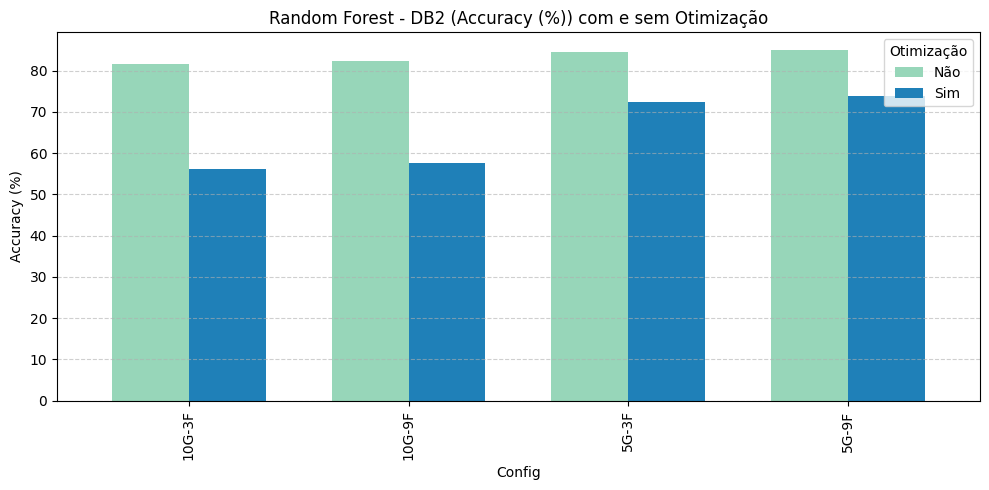

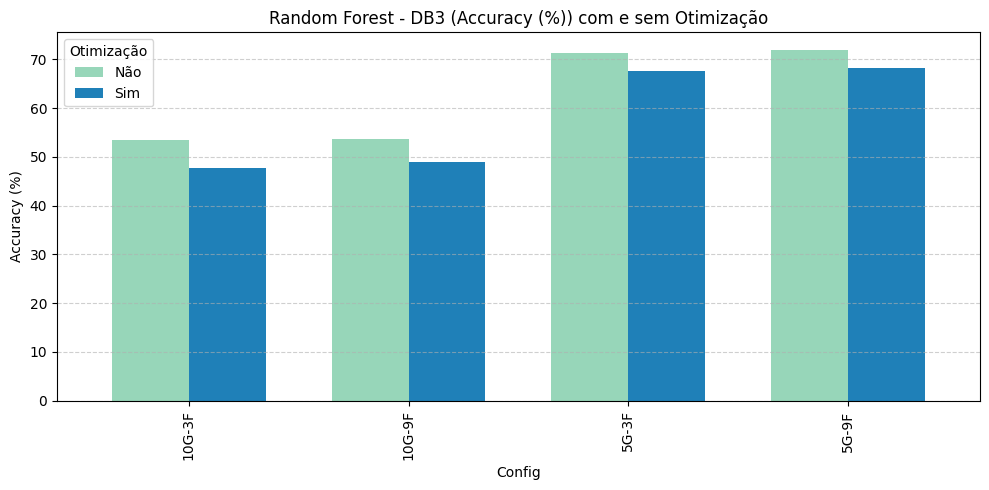

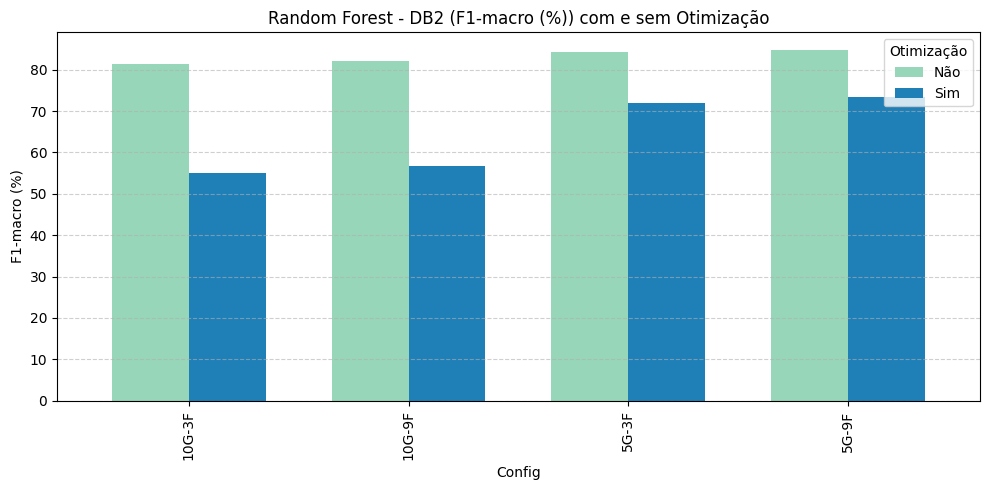

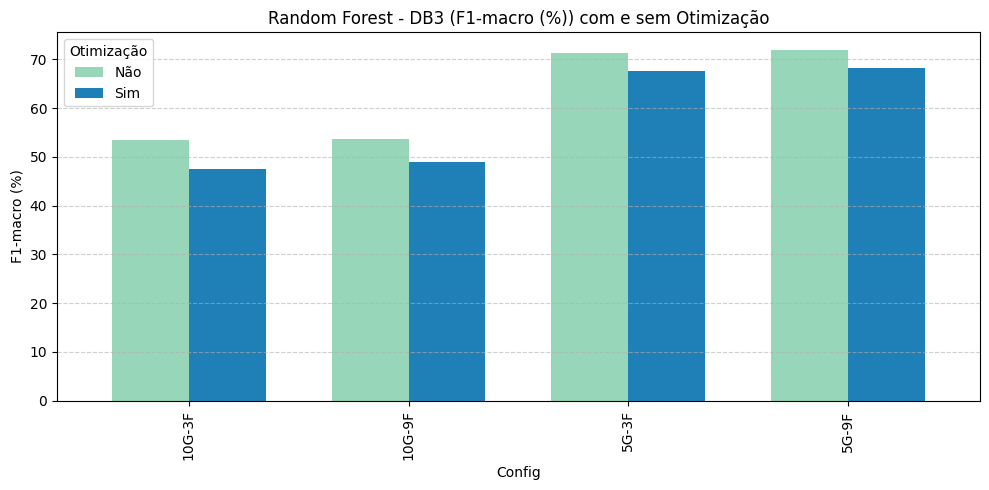

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados fornecidos
data = [
    {"Database": "DB2", "Gestures": 5, "Features": 3, "Accuracy": 0.7237, "F1_macro": 0.7186, "Otimizacao": "Sim"},
    {"Database": "DB2", "Gestures": 5, "Features": 9, "Accuracy": 0.7389, "F1_macro": 0.7337, "Otimizacao": "Sim"},
    {"Database": "DB2", "Gestures": 10, "Features": 3, "Accuracy": 0.5606, "F1_macro": 0.5510, "Otimizacao": "Sim"},
    {"Database": "DB2", "Gestures": 10, "Features": 9, "Accuracy": 0.5754, "F1_macro": 0.5676, "Otimizacao": "Sim"},
    {"Database": "DB3", "Gestures": 5, "Features": 3, "Accuracy": 0.6768, "F1_macro": 0.6765, "Otimizacao": "Sim"},
    {"Database": "DB3", "Gestures": 5, "Features": 9, "Accuracy": 0.6832, "F1_macro": 0.6830, "Otimizacao": "Sim"},
    {"Database": "DB3", "Gestures": 10, "Features": 3, "Accuracy": 0.4768, "F1_macro": 0.4744, "Otimizacao": "Sim"},
    {"Database": "DB3", "Gestures": 10, "Features": 9, "Accuracy": 0.4895, "F1_macro": 0.4885, "Otimizacao": "Sim"},
    {"Database": "DB2", "Gestures": 5, "Features": 3, "Accuracy": 0.8460, "F1_macro": 0.8437, "Otimizacao": "Não"},
    {"Database": "DB2", "Gestures": 5, "Features": 9, "Accuracy": 0.8504, "F1_macro": 0.8482, "Otimizacao": "Não"},
    {"Database": "DB2", "Gestures": 10, "Features": 3, "Accuracy": 0.8159, "F1_macro": 0.8135, "Otimizacao": "Não"},
    {"Database": "DB2", "Gestures": 10, "Features": 9, "Accuracy": 0.8226, "F1_macro": 0.8203, "Otimizacao": "Não"},
    {"Database": "DB3", "Gestures": 5, "Features": 3, "Accuracy": 0.7127, "F1_macro": 0.7126, "Otimizacao": "Não"},
    {"Database": "DB3", "Gestures": 5, "Features": 9, "Accuracy": 0.7194, "F1_macro": 0.7193, "Otimizacao": "Não"},
    {"Database": "DB3", "Gestures": 10, "Features": 3, "Accuracy": 0.5343, "F1_macro": 0.5345, "Otimizacao": "Não"},
    {"Database": "DB3", "Gestures": 10, "Features": 9, "Accuracy": 0.5366, "F1_macro": 0.5366, "Otimizacao": "Não"},
]

df = pd.DataFrame(data)

# Função para plotar gráfico de barras agrupadas com seaborn + matplotlib
def plot_colored_bar_comparison(df, db_name, metric, ylabel, cmap_name="YlGnBu"):
    df_db = df[df["Database"] == db_name].copy()
    df_db["Config"] = df_db["Gestures"].astype(str) + "G-" + df_db["Features"].astype(str) + "F"

    pivot_df = df_db.pivot(index="Config", columns="Otimizacao", values=metric) * 100
    pivot_df = pivot_df[["Não", "Sim"]]  # manter ordem

    colors = sns.color_palette(cmap_name, n_colors=2)

    ax = pivot_df.plot(kind="bar", figsize=(10, 5), width=0.7, color=colors)
    ax.set_ylabel(ylabel)
    ax.set_title(f"Random Forest - {db_name} ({ylabel}) com e sem Otimização")
    ax.legend(title="Otimização")
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Gerar os 4 gráficos
plot_colored_bar_comparison(df, "DB2", "Accuracy", "Accuracy (%)", "YlGnBu")
plot_colored_bar_comparison(df, "DB3", "Accuracy", "Accuracy (%)", "YlGnBu")
plot_colored_bar_comparison(df, "DB2", "F1_macro", "F1-macro (%)", "YlGnBu")
plot_colored_bar_comparison(df, "DB3", "F1_macro", "F1-macro (%)", "YlGnBu")
